In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
N = 100000
values = np.sort(np.random.randint(0, 1_000_000, size=N))
positions = np.arange(N)

In [6]:
# Create model
class Model(nn.Module):
    def __init__(self, in_features=1, n_hidden=16, out_features=1):
        super().__init__()
        self.fc1 = nn.Linear(in_features, n_hidden)
        self.fc2 = nn.Linear(n_hidden, n_hidden)
        self.fc3 = nn.Linear(n_hidden, out_features)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

In [7]:
model = Model()

In [8]:
# Create dataframe
df = pd.DataFrame(values, columns=['Values'])
df['Idx'] = range(0,100_000)

In [9]:
X = df.drop('Values', axis=1)
y = df['Values']

X = X.values
y = y.values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
X_train = torch.tensor(X_train, dtype=torch.float32).reshape(-1, 1)
X_test  = torch.tensor(X_test, dtype=torch.float32).reshape(-1, 1)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
y_test  = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

y_train = y_train / y_train.max()
y_test  = y_test / y_test.max()

In [13]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [14]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())

    if i % 10 == 0:
        print(f'Epoch: {i}, Loss: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

Epoch: 0, Loss: 0.5149583220481873
Epoch: 10, Loss: 0.44248902797698975
Epoch: 20, Loss: 0.2118925303220749
Epoch: 30, Loss: 0.09038784354925156
Epoch: 40, Loss: 0.10482411086559296
Epoch: 50, Loss: 0.10349279642105103
Epoch: 60, Loss: 0.34247851371765137
Epoch: 70, Loss: 0.08661295473575592
Epoch: 80, Loss: 0.08418399095535278
Epoch: 90, Loss: 0.09455645829439163


Text(0, 0.5, 'loss/error')

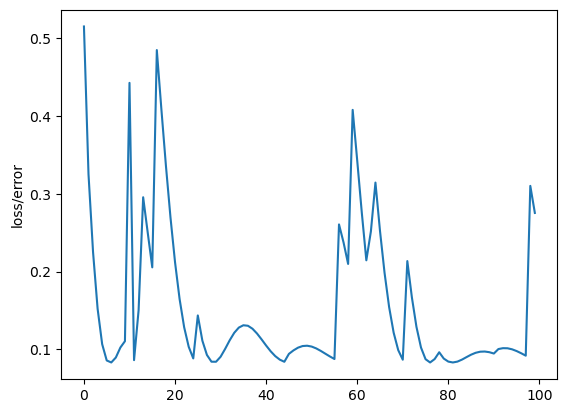

In [15]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")

In [16]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)
loss

tensor(0.2339)